#### Import of Libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [138]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [139]:
df = pd.read_csv('datasets/winequality-white/winequality-white.csv')
#valueChange(["LargestSpotSize","SpotDistribution"])


In [140]:
df.head(5)

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [141]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FixedAcidity        4898 non-null   float64
 1   VolatileAcidity     4898 non-null   float64
 2   CitricAcid          4898 non-null   float64
 3   ResidualSugar       4898 non-null   float64
 4   Chlorides           4898 non-null   float64
 5   FreeSulfurDioxide   4898 non-null   float64
 6   TotalSulfurDioxide  4898 non-null   float64
 7   Density             4898 non-null   float64
 8   PH                  4898 non-null   float64
 9   Sulphates           4898 non-null   float64
 10  Alcohol             4898 non-null   float64
 11  Class               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Number of duplicated rows is:  937
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

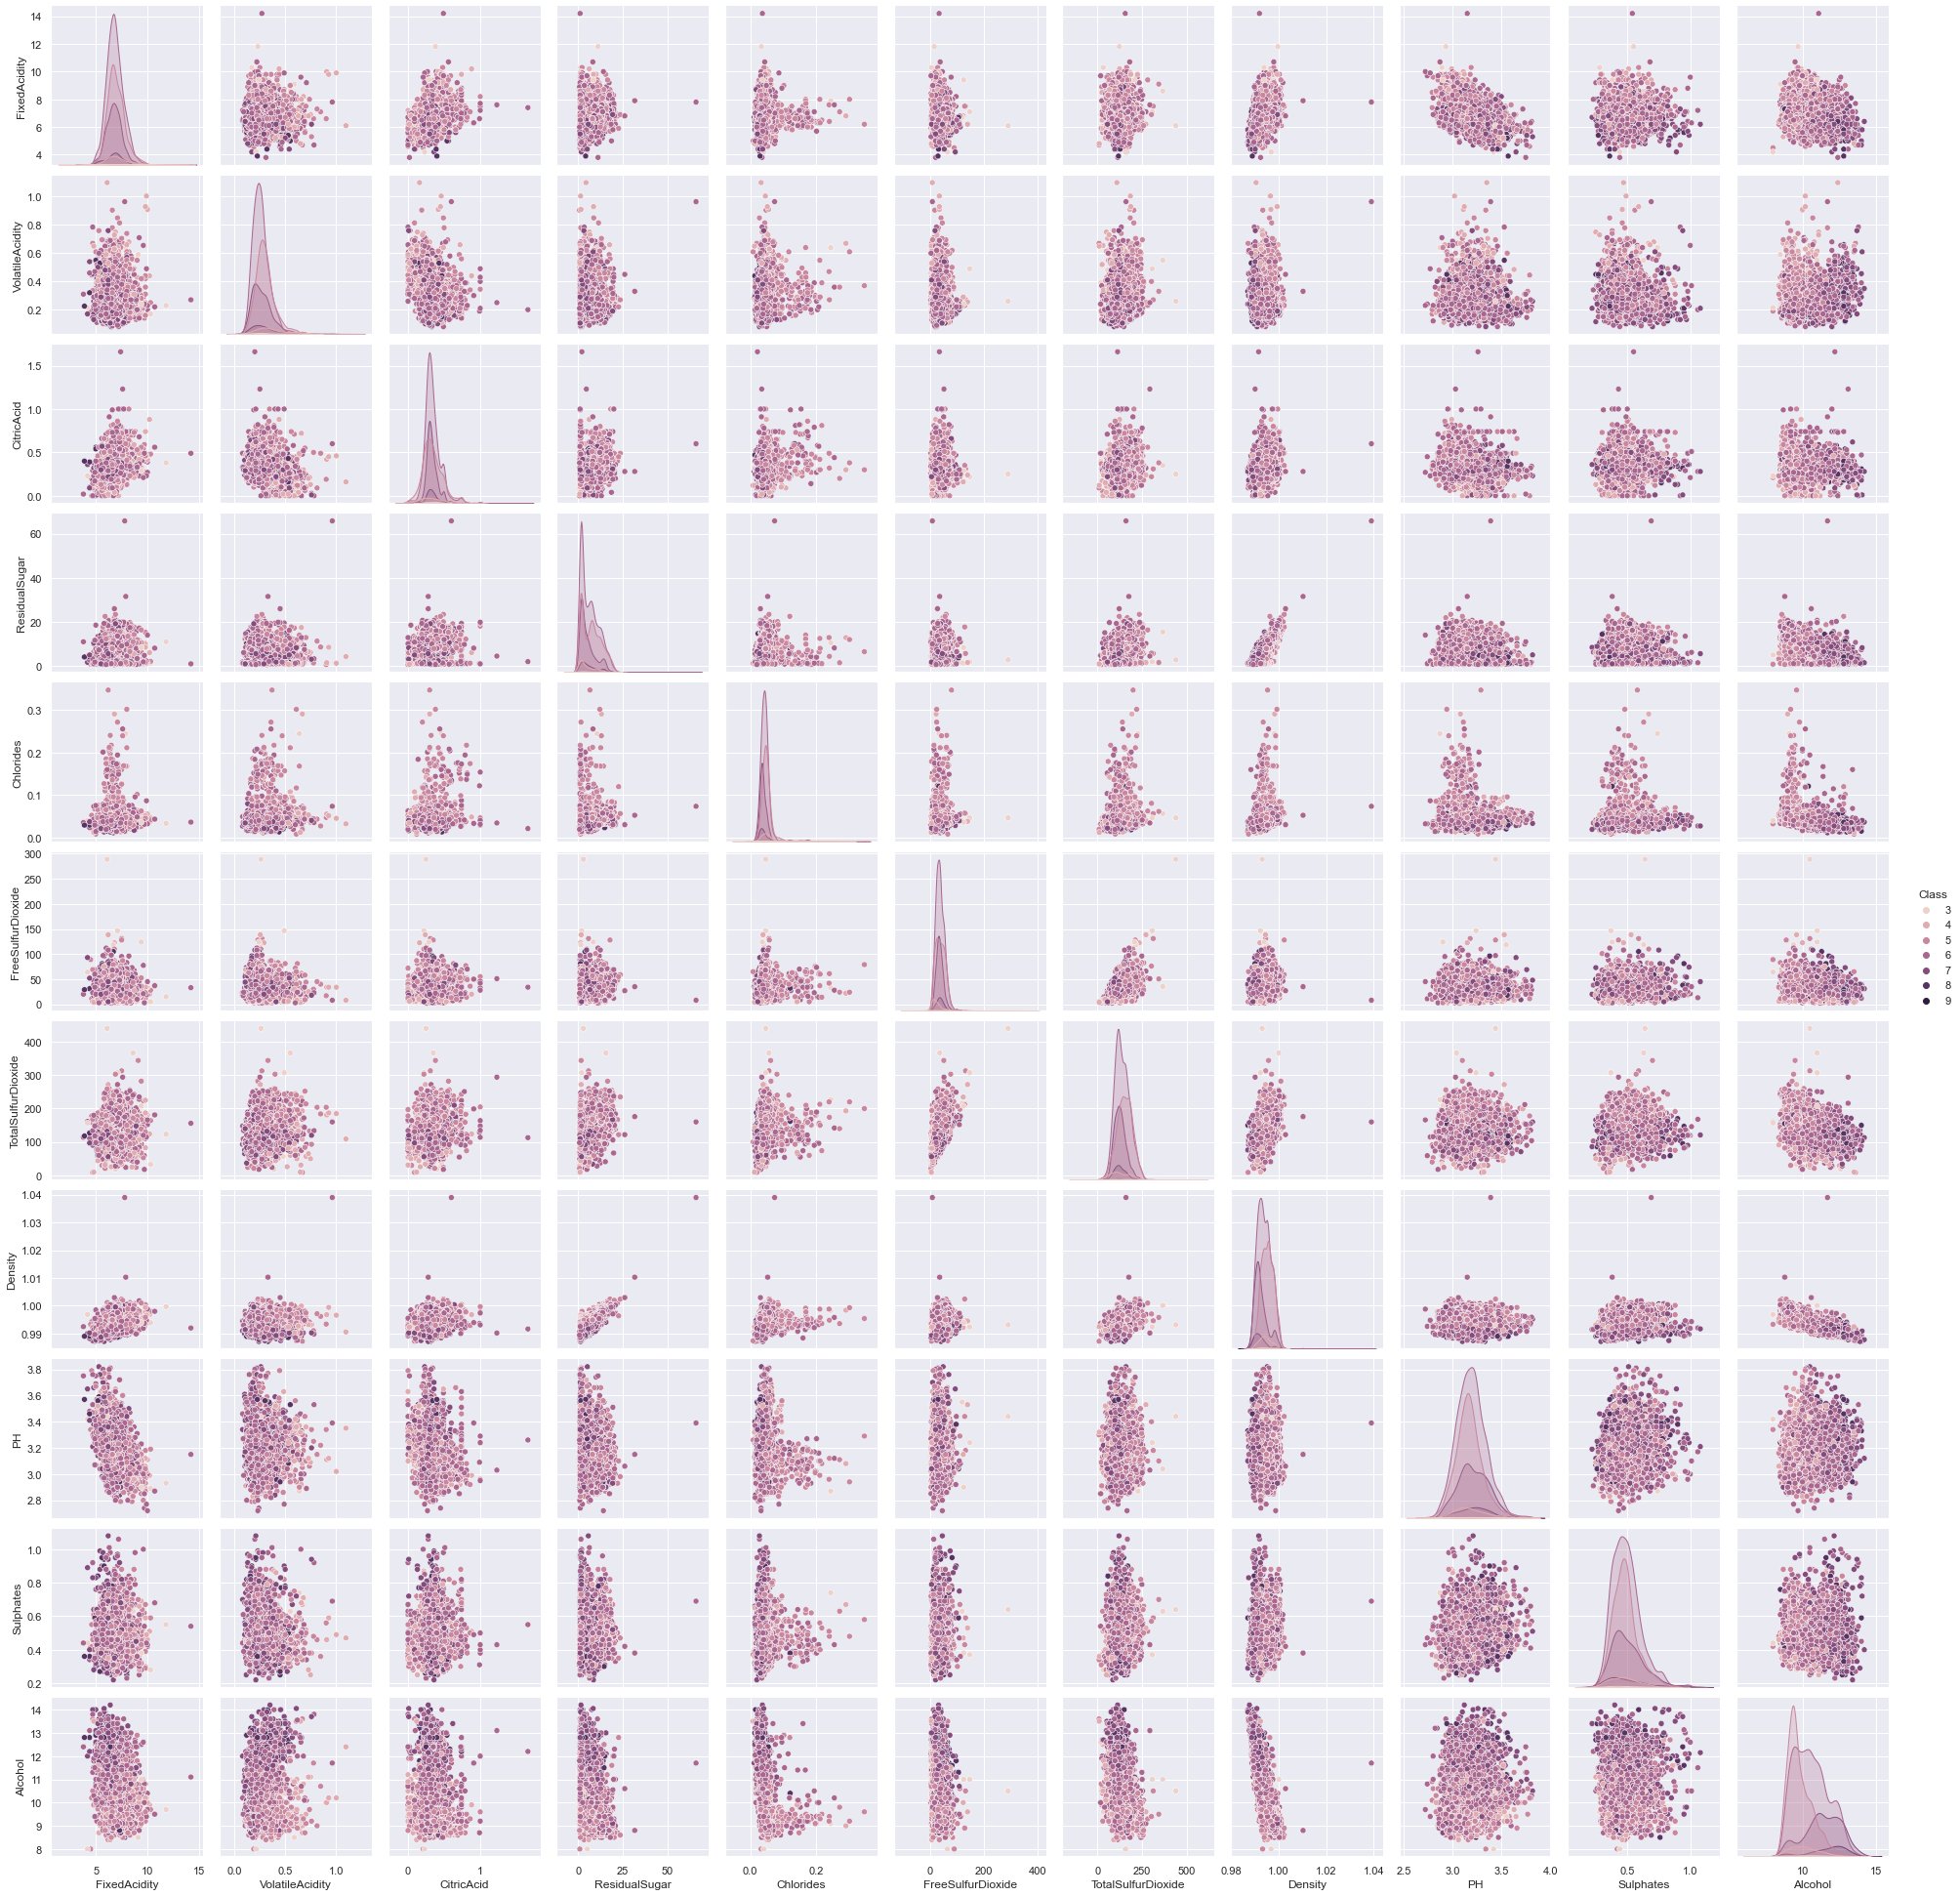

In [142]:
sns.pairplot(df, hue='Class')
plt.show()

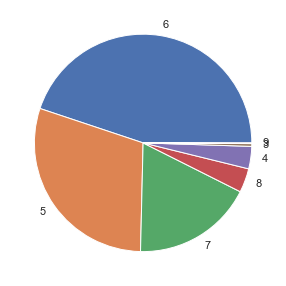

In [143]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [144]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FixedAcidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
VolatileAcidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
CitricAcid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
ResidualSugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
Chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
FreeSulfurDioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
TotalSulfurDioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
Density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
PH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
Sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


#### Standardize the Data

In [145]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FixedAcidity,4898.0,-3.481630e-16,1.000102,-3.620351,-0.657501,-0.064931,0.527639,8.705106
VolatileAcidity,4898.0,4.497106e-16,1.000102,-1.966985,-0.677101,-0.180992,0.414339,8.153643
CitricAcid,4898.0,1.160543e-17,1.000102,-2.761743,-0.530476,-0.117278,0.461199,10.956420
ResidualSugar,4898.0,-1.066249e-16,1.000102,-1.141944,-0.925047,-0.234922,0.691818,11.714112
Chlorides,4898.0,3.133467e-16,1.000102,-1.683274,-0.447335,-0.126906,0.193523,13.743076
FreeSulfurDioxide,4898.0,-1.015476e-17,1.000102,-1.958677,-0.723775,-0.076922,0.628736,14.918314
TotalSulfurDioxide,4898.0,-4.642174e-17,1.000102,-3.044230,-0.714474,-0.102619,0.673966,7.098444
Density,4898.0,3.247201e-14,1.000102,-2.313038,-0.770707,-0.096093,0.693046,15.031298
PH,4898.0,-1.183754e-15,1.000102,-3.101408,-0.650836,-0.054751,0.607565,4.184075
Sulphates,4898.0,-8.218098e-16,1.000102,-2.364709,-0.699710,-0.173921,0.527131,5.171602


#### Observations and Variables

In [146]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

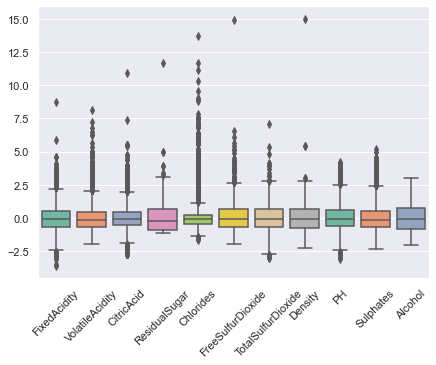

In [147]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

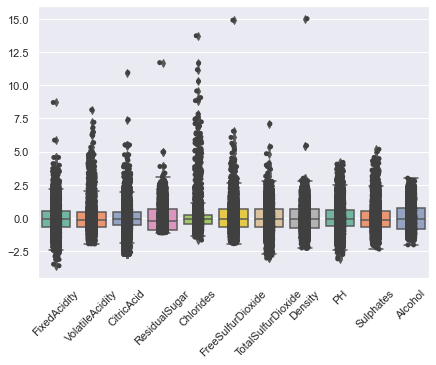

In [148]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

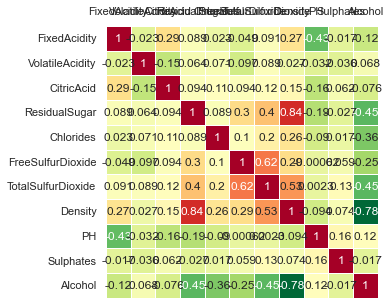

In [149]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [150]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [151]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244
...,...,...,...,...,...,...,...,...,...
4893,-2.094367,0.390789,0.325364,0.088145,-0.755337,-0.283772,-0.108921,-0.148646,-0.117824
4894,1.295014,0.490753,-0.066307,-0.381234,0.267347,0.839791,0.033669,-0.157898,-0.474523
4895,-0.779731,-0.408480,-0.664677,-0.134766,-0.808279,0.133791,-1.616482,-0.278473,-1.239170
4896,-3.407302,0.915744,-0.268297,-0.762126,-0.080705,0.497135,0.978533,-0.165963,-0.101411


Scatter Plot

In [152]:
model.scatter(label=True, legend=False)

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'9 Principal Components explain [99.81%] of the variance'}, xlabel='PC1 (29.2% expl.var)', ylabel='PC2 (14.3% expl.var)'>)

Error in callback <function flush_figures at 0x000001628BE7A288> (for post_execute):


KeyboardInterrupt: 

Eigenvectors

In [ ]:
A = out['loadings'].T

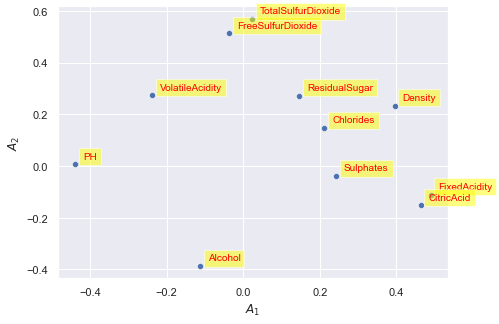

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

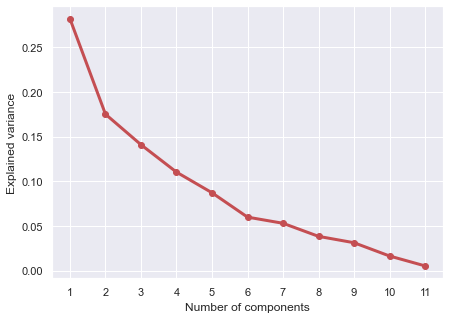

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

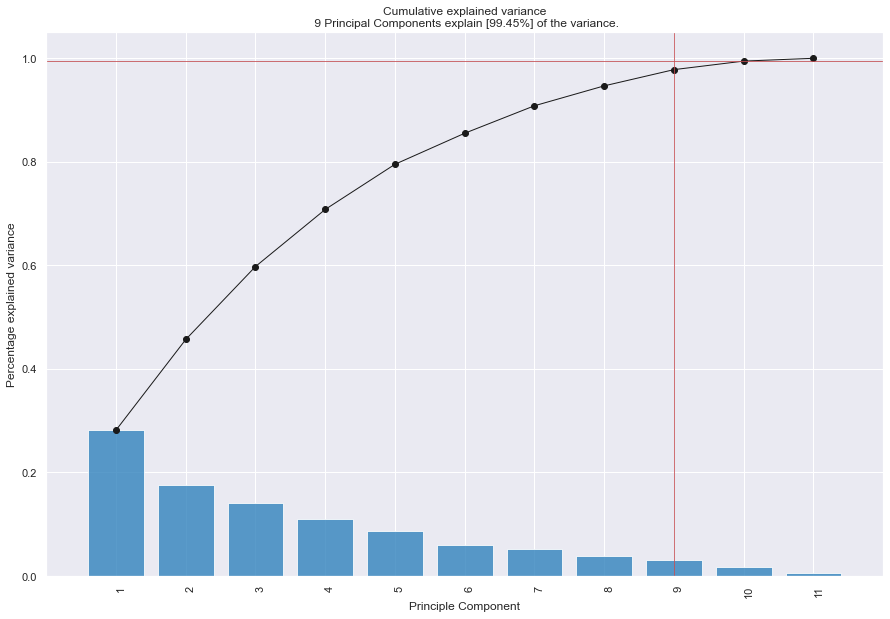

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();